# Import

In [324]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [325]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [326]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
profiles = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [285]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(profiles.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [286]:
# --- Duplikasi dataframe agar data asli tetap aman ---
competencies_clean = competencies.copy()

# Ganti nilai di luar 1–5 menjadi NaN
competencies_clean.loc[
    (competencies_clean['score'] < 1) | (competencies_clean['score'] > 5),
    'score'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi score setelah pembersihan:\n")
print(competencies_clean['score'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = competencies_clean['score'].isna().sum()
print(f"\nJumlah nilai score yang diubah menjadi NaN: {num_nan}")



Distribusi score setelah pembersihan:

score
1.0     8688
2.0    17857
3.0    28206
4.0    22936
5.0    11523
NaN    11290
Name: count, dtype: int64

Jumlah nilai score yang diubah menjadi NaN: 11290


In [287]:
# Pivot data agar 'year' jadi kolom, dan 'score' jadi nilai
competencies_pivot = competencies_clean.pivot_table(
   index=['employee_id', 'year'],
    columns='pillar_code',
    values='score'
).reset_index()

# (Opsional) urutkan kolom tahun
competencies_pivot = competencies_pivot[['employee_id'] + sorted([c for c in competencies_pivot.columns if c != 'employee_id'])]

display(competencies_pivot)


pillar_code,employee_id,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,year
0,DUP1942,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2021
1,DUP1942,3.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2022
2,DUP1942,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2023
3,DUP1942,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,NaN,2.0,2024
4,DUP1942,4.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
9737,EMP101999,4.0,3.0,NaN,4.0,3.0,4.0,4.0,4.0,4.0,NaN,2021
9738,EMP101999,2.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2022
9739,EMP101999,2.0,2.0,2.0,3.0,NaN,3.0,4.0,3.0,3.0,2.0,2023
9740,EMP101999,NaN,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2024


In [288]:
# Pivot data dari long ke wide
papi_wide = papi.pivot_table(
    index='employee_id',
    columns='scale_code',
    values='score'
).reset_index()

# Rapikan nama kolom (hapus multiindex kalau ada)
papi_wide.columns.name = None

# Lihat hasil
display(papi_wide.shape)
display(papi_wide.head())


(2010, 21)

,employee_id,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z
0,DUP1942,6.0,NaN,1.0,4.0,3.0,5.0,4.0,1.0,3.0,6.0,NaN,3.0,5.0,7.0,9.0,9.0,1.0,8.0,3.0,NaN
1,DUP2096,1.0,6.0,9.0,3.0,4.0,1.0,2.0,6.0,9.0,3.0,1.0,4.0,4.0,6.0,8.0,2.0,6.0,3.0,8.0,2.0
2,DUP2722,2.0,NaN,6.0,4.0,1.0,4.0,9.0,9.0,1.0,3.0,8.0,2.0,NaN,6.0,1.0,7.0,3.0,6.0,3.0,3.0
3,DUP3015,5.0,4.0,3.0,4.0,9.0,2.0,8.0,9.0,1.0,7.0,5.0,1.0,8.0,7.0,3.0,NaN,NaN,3.0,5.0,3.0
4,DUP3452,7.0,9.0,1.0,9.0,7.0,3.0,NaN,2.0,1.0,4.0,NaN,NaN,4.0,2.0,9.0,NaN,9.0,1.0,6.0,4.0


In [289]:
strength_wide = strength.pivot_table(
    index="employee_id",
    columns="theme",
    values="rank",
    aggfunc='min'  # bisa 'max', 'first', 'last', dsb
).reset_index()
strength_wide

theme,employee_id,Achiever,Activator,Adaptability,Analytical,Arranger,Belief,Command,Communication,Competition,Connectedness,Consistency,Context,Deliberative,Developer,Discipline,Empathy,Focus,Futuristic,Harmony,Ideation,Includer,Individualization,Input,Intellection,Learner,Maximizer,Positivity,Relator,Responsibility,Restorative,Self-Assurance,Significance,Strategic,Woo
0,DUP1942,NaN,NaN,NaN,NaN,NaN,6.0,NaN,12.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,4.0,3.0,NaN,13.0,7.0,NaN,1.0,2.0,11.0,NaN,NaN,5.0,NaN,8.0,NaN,14.0
1,DUP2096,11.0,6.0,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,14.0,NaN,10.0,NaN,4.0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,5.0
2,DUP2722,NaN,8.0,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14.0,NaN,NaN,6.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,NaN,12.0,11.0,NaN,NaN,NaN,2.0,13.0,NaN,NaN
3,DUP3015,NaN,NaN,NaN,NaN,12.0,NaN,6.0,4.0,NaN,NaN,NaN,2.0,11.0,NaN,NaN,9.0,NaN,NaN,NaN,5.0,3.0,NaN,NaN,8.0,7.0,NaN,14.0,13.0,1.0,NaN,NaN,NaN,10.0,NaN
4,DUP3452,NaN,NaN,9.0,NaN,2.0,NaN,NaN,12.0,NaN,10.0,NaN,7.0,NaN,1.0,NaN,NaN,NaN,4.0,NaN,11.0,NaN,NaN,NaN,NaN,5.0,6.0,NaN,13.0,NaN,NaN,3.0,8.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,EMP101995,NaN,NaN,10.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,8.0,NaN,13.0,11.0,NaN,9.0,NaN,NaN,14.0,NaN,12.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2006,EMP101996,2.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,6.0,NaN,11.0,NaN,7.0,13.0,NaN,5.0,1.0,NaN,NaN,4.0,NaN,NaN,10.0,3.0
2007,EMP101997,NaN,12.0,NaN,11.0,NaN,8.0,NaN,14.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,3.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1.0,5.0,NaN,4.0,NaN,NaN,NaN,NaN
2008,EMP101998,1.0,4.0,NaN,NaN,12.0,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,14.0,13.0,NaN,NaN,NaN,8.0,NaN,11.0,NaN,6.0,NaN,NaN,7.0,NaN,9.0,5.0,NaN,NaN,10.0


In [290]:
pillars = pd.read_excel(file_path, sheet_name="dim_competency_pillars")

dim_grades = pd.read_excel(file_path, sheet_name="dim_grades")
dim_directorates = pd.read_excel(file_path, sheet_name="dim_directorates")
dim_divisions = pd.read_excel(file_path, sheet_name="dim_divisions")
dim_departments = pd.read_excel(file_path, sheet_name="dim_departments")
dim_positions = pd.read_excel(file_path, sheet_name="dim_positions")
dim_education = pd.read_excel(file_path, sheet_name="dim_education")
dim_majors = pd.read_excel(file_path, sheet_name="dim_majors")
dim_areas = pd.read_excel(file_path, sheet_name="dim_areas")
dim_companies = pd.read_excel(file_path, sheet_name="dim_companies")


In [291]:
# Buat dictionary mapping dari setiap tabel dimensi
map_company = dict(zip(dim_companies["company_id"], dim_companies["name"]))
map_area = dict(zip(dim_areas["area_id"], dim_areas["name"]))
map_position = dict(zip(dim_positions["position_id"], dim_positions["name"]))
map_department = dict(zip(dim_departments["department_id"], dim_departments["name"]))
map_division = dict(zip(dim_divisions["division_id"], dim_divisions["name"]))
map_directorate = dict(zip(dim_directorates["directorate_id"], dim_directorates["name"]))
map_grade = dict(zip(dim_grades["grade_id"], dim_grades["name"]))
map_education = dict(zip(dim_education["education_id"], dim_education["name"]))
map_major = dict(zip(dim_majors["major_id"], dim_majors["name"]))

# Duplikasi data asli agar tidak mengubah 'employees'
employees_name = employees.copy()

# Mapping ID → Nama
employees_name["company_id"] = employees_name["company_id"].map(map_company)
employees_name["area_id"] = employees_name["area_id"].map(map_area)
employees_name["position_id"] = employees_name["position_id"].map(map_position)
employees_name["department_id"] = employees_name["department_id"].map(map_department)
employees_name["division_id"] = employees_name["division_id"].map(map_division)
employees_name["directorate_id"] = employees_name["directorate_id"].map(map_directorate)
employees_name["grade_id"] = employees_name["grade_id"].map(map_grade)
employees_name["education_id"] = employees_name["education_id"].map(map_education)
employees_name["major_id"] = employees_name["major_id"].map(map_major)

# Ubah nama kolom menjadi lebih deskriptif
employees_name = employees_name.rename(columns={
    "company_id": "company_name",
    "area_id": "area_name",
    "position_id": "position_name",
    "department_id": "department_name",
    "division_id": "division_name",
    "directorate_id": "directorate_name",
    "grade_id": "grade_name",
    "education_id": "education_name",
    "major_id": "major_name"
})

display(employees_name.head())


,employee_id,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


# EDA

# Outlier Score

### Performance

In [292]:
performance

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021
...,...,...,...
10045,DUP1942,5.0,2025
10046,DUP2096,3.0,2025
10047,DUP4177,2.0,2025
10048,DUP9801,5.0,2025


In [293]:
rating_performance = pd.DataFrame({
    'Jumlah': performance['rating'].value_counts().sort_index(),
    'Persentase (%)': (performance['rating'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_performance)

,Jumlah,Persentase (%)
rating,,
0.0,15,0.17
1.0,672,7.52
2.0,1578,17.65
3.0,3339,37.34
4.0,2437,27.25
5.0,881,9.85
6.0,13,0.15
99.0,7,0.08


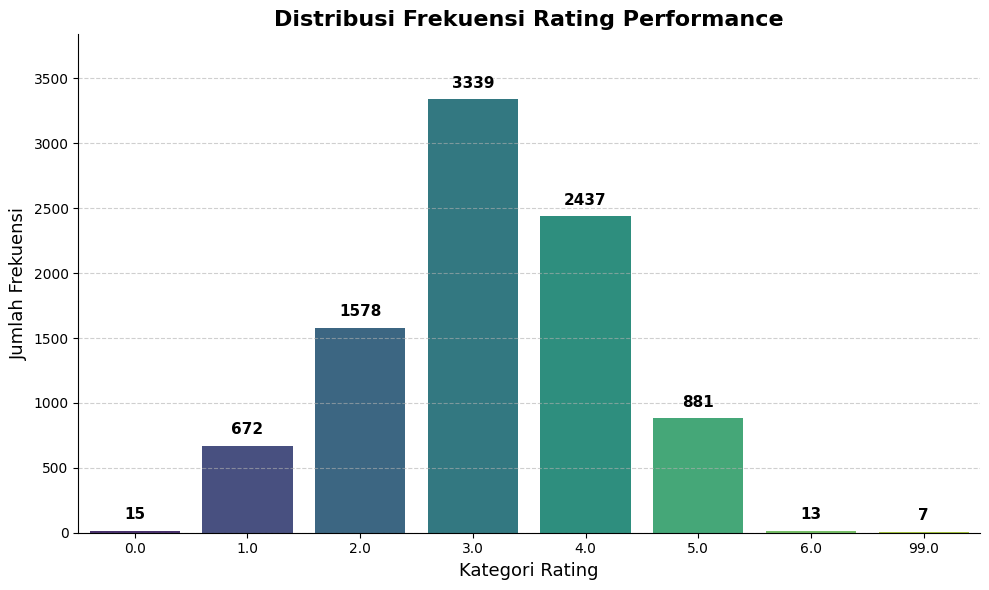

In [294]:
# Hitung frekuensi nilai rating
rating_counts = performance['rating'].value_counts().sort_index()
df_counts = rating_counts.reset_index()
df_counts.columns = ['Rating', 'Jumlah']

# Plot distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi Rating Performance', fontsize=16, weight='bold')
plt.xlabel('Kategori Rating', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [295]:
# --- Duplikasi dataframe agar data asli tetap aman ---
performance_clean = performance.copy()

# Ganti nilai di luar 1–5 menjadi NaN
performance_clean.loc[
    (performance_clean['rating'] < 1) | (performance_clean['rating'] > 5),
    'rating'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi rating setelah pembersihan:\n")
print(performance_clean['rating'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = performance_clean['rating'].isna().sum()
print(f"\nJumlah nilai rating yang diubah menjadi NaN: {num_nan}")



Distribusi rating setelah pembersihan:

rating
1.0     672
2.0    1578
3.0    3339
4.0    2437
5.0     881
NaN    1143
Name: count, dtype: int64

Jumlah nilai rating yang diubah menjadi NaN: 1143


In [296]:
performance_employees = (
    performance_clean
    .merge(employees, on="employee_id", how="left")
)
display(performance_employees.head())

# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees['years_of_service_adjusted'] = (
    performance_employees['years_of_service_months']
    - (LATEST_YEAR - performance_employees['year']) * 12
)

# Hapus baris dengan masa kerja negatif
performance_employees = performance_employees[
    performance_employees['years_of_service_adjusted'] >= 0
].copy()

# Hapus kolom 'years_of_service_months' karena sudah tidak dibutuhkan
performance_employees.drop(columns=['years_of_service_months'], inplace=True)

# Tampilkan hasil akhir
display(performance_employees.head())


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,10
5,EMP100005,NaN,2021,Bayu Zulfikar,590302,1,1,5,2,3,1,1,3,1,18
6,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,34
7,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,8


### Competencies

In [297]:
corr_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id',
    'years_of_service_adjusted',
    'rating'
]

corr_vars_name = [
    'company_name',
    'area_name',
    'position_name',
    'department_name',
    'division_name',
    'directorate_name',
    'grade_name',
    'education_name',
    'major_name',
    'years_of_service_adjusted',
    'rating'
]

In [298]:
import numpy as np
import pandas as pd
from scipy import stats

df_name = performance_employees_name.copy()
df_name['rating'] = pd.to_numeric(df_name['rating'], errors='coerce')
print("Missing per var:\n", df_name[corr_vars_name].isna().mean())


Missing per var:
 company_name                 0.000000
area_name                    0.000000
position_name                0.000000
department_name              0.000000
division_name                0.000000
directorate_name             0.000000
grade_name                   0.000000
education_name               0.000000
major_name                   0.000000
years_of_service_adjusted    0.000000
rating                       0.087086
dtype: float64


In [299]:
import numpy as np
import pandas as pd
from scipy import stats

df = performance_employees.copy()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print("Missing per var:\n", df[corr_vars].isna().mean())


Missing per var:
 company_id                   0.000000
area_id                      0.000000
position_id                  0.000000
department_id                0.000000
division_id                  0.000000
directorate_id               0.000000
grade_id                     0.000000
education_id                 0.000000
major_id                     0.000000
years_of_service_adjusted    0.000000
rating                       0.087086
dtype: float64


In [300]:
df

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,10
5,EMP100005,NaN,2021,Bayu Zulfikar,590302,1,1,5,2,3,1,1,3,1,18
6,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,34
7,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,DUP1942,5.0,2025,Dewi Fadillah Hidayat,325441,4,4,1,4,1,1,2,2,2,79
10046,DUP2096,3.0,2025,Putri Wibowo,149080,3,3,4,4,2,2,1,3,4,49
10047,DUP4177,2.0,2025,Adi Ginting,116115,4,2,6,4,4,2,3,2,1,75
10048,DUP9801,5.0,2025,Ayu Kusuma Santoso,889823,2,3,3,3,1,3,1,2,4,7


In [301]:
competencies_pivot

pillar_code,employee_id,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,year
0,DUP1942,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2021
1,DUP1942,3.0,3.0,3.0,2.0,2.0,3.0,4.0,3.0,3.0,3.0,2022
2,DUP1942,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2023
3,DUP1942,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,NaN,2.0,2024
4,DUP1942,4.0,5.0,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...
9737,EMP101999,4.0,3.0,NaN,4.0,3.0,4.0,4.0,4.0,4.0,NaN,2021
9738,EMP101999,2.0,2.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2022
9739,EMP101999,2.0,2.0,2.0,3.0,NaN,3.0,4.0,3.0,3.0,2.0,2023
9740,EMP101999,NaN,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,1.0,2024


In [302]:
df.shape

(8084, 15)

In [303]:
display(competencies_pivot.shape)
display(profiles.shape)
display(papi_wide.shape)
display(strength_wide.shape)

(9742, 12)

(2010, 9)

(2010, 21)

(2010, 35)

In [304]:
for name, dset in {
    "df": df,
    "competencies_pivot": competencies_pivot,
    "profiles": profiles,
    "papi_wide": papi_wide,
    "strength_wide": strength_wide
}.items():
    dup = dset['employee_id'].duplicated().sum()
    print(f"{name} duplicate employee_id: {dup}")


df duplicate employee_id: 6074
competencies_pivot duplicate employee_id: 7732
profiles duplicate employee_id: 0
papi_wide duplicate employee_id: 0
strength_wide duplicate employee_id: 0


In [305]:
df = df.merge(
    competencies_pivot,
    on=['employee_id', 'year'],
    how='left'
    )

display(df.head())


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_adjusted,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,16,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
1,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,10,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,NaN
2,EMP100005,NaN,2021,Bayu Zulfikar,590302,1,1,5,2,3,1,1,3,1,18,3.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0
3,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,34,4.0,NaN,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0
4,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,8,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0


In [306]:
df = df.merge(profiles, on="employee_id", how="left")

In [307]:
df = df.merge(papi_wide, on="employee_id", how="left")

In [308]:
df = df.merge(strength_wide, on="employee_id", how="left")

In [309]:
df.shape

(8084, 87)

In [310]:
df['is_high'] = (df['rating'] == 5).astype(int)


In [311]:
display(df.shape)
display(df.head())

(8084, 88)

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_adjusted,CEX,CSI,FTC,GDR,IDS,LIE,QDD,SEA,STO,VCU,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki,Papi_A,Papi_B,Papi_C,Papi_D,Papi_E,Papi_F,Papi_G,Papi_I,Papi_K,Papi_L,Papi_N,Papi_O,Papi_P,Papi_R,Papi_S,Papi_T,Papi_V,Papi_W,Papi_X,Papi_Z,Achiever,Activator,Adaptability,Analytical,Arranger,Belief,Command,Communication,Competition,Connectedness,Consistency,Context,Deliberative,Developer,Discipline,Empathy,Focus,Futuristic,Harmony,Ideation,Includer,Individualization,Input,Intellection,Learner,Maximizer,Positivity,Relator,Responsibility,Restorative,Self-Assurance,Significance,Strategic,Woo,is_high
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,16,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2,1.0,6.0,5.0,NaN,1.0,3.0,5.0,8.0,NaN,7.0,2.0,9.0,3.0,7.0,9.0,3.0,4.0,4.0,2.0,1.0,NaN,5.0,2.0,13.0,NaN,NaN,12.0,11.0,4.0,NaN,NaN,3.0,NaN,10.0,NaN,8.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,14.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,0
1,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,10,3.0,2.0,1.0,1.0,2.0,1.0,3.0,2.0,2.0,NaN,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3,2.0,NaN,4.0,2.0,5.0,7.0,2.0,8.0,4.0,NaN,9.0,5.0,3.0,1.0,3.0,9.0,9.0,1.0,4.0,6.0,NaN,NaN,NaN,11.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,14.0,NaN,NaN,1.0,NaN,NaN,NaN,3.0,0
2,EMP100005,NaN,2021,Bayu Zulfikar,590302,1,1,5,2,3,1,1,3,1,18,3.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,2.0,69,35,DC,Dominant-Conscientious,NaN,130.0,21.0,7,NaN,5.0,4.0,6.0,6.0,7.0,3.0,NaN,5.0,1.0,NaN,NaN,6.0,2.0,8.0,1.0,8.0,2.0,8.0,9.0,NaN,NaN,NaN,NaN,13.0,11.0,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,1.0,NaN,12.0,NaN,NaN,2.0,10.0,9.0,NaN,14.0,NaN,3.0,0
3,EMP100006,4.0,2021,Indra Santoso,826406,1,3,3,2,1,2,1,1,4,34,4.0,NaN,4.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,94,24,SC,Steadiness-Conscientious,ESFP,139.0,27.0,6,7.0,9.0,6.0,4.0,6.0,1.0,9.0,3.0,6.0,6.0,2.0,NaN,7.0,3.0,4.0,8.0,6.0,NaN,NaN,7.0,8.0,NaN,NaN,2.0,13.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,6.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,14.0,4.0,NaN,12.0,3.0,NaN,5.0,NaN,NaN,NaN,0
4,EMP100007,4.0,2021,Rani Mahendra,878510,4,3,4,3,2,2,3,2,1,8,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,65,45,DS,Dominant-Steadiness,ESFJ,99.0,17.0,4,1.0,2.0,5.0,2.0,2.0,7.0,1.0,7.0,7.0,2.0,7.0,9.0,9.0,9.0,3.0,3.0,5.0,9.0,NaN,6.0,NaN,NaN,7.0,NaN,NaN,12.0,NaN,4.0,NaN,1.0,3.0,10.0,NaN,NaN,13.0,NaN,5.0,NaN,NaN,NaN,11.0,9.0,NaN,NaN,NaN,8.0,6.0,NaN,NaN,NaN,NaN,NaN,2.0,14.0,0


In [312]:
# === 0) PERSIAPAN ===
from sklearn.metrics import roc_auc_score
from scipy import stats
import numpy as np
import pandas as pd

# Target biner (pastikan sudah ada kolom 'rating' di df)
df['is_high'] = (df['rating'] == 5).astype(int)

# Kolom 'year' yang dipakai
YEAR_COL = 'year_x' if 'year_x' in df.columns else 'year'

# =========================================
# UTILITIES
# =========================================
def zscore(series):
    s = pd.to_numeric(series, errors='coerce')
    return (s - s.mean()) / (s.std(ddof=0) + 1e-9)

def point_biserial(x, y):
    x = pd.to_numeric(x, errors='coerce')
    mask = x.notna() & y.notna()
    if mask.sum() < 10 or y[mask].nunique() < 2:
        return 0.0
    r, _ = stats.pointbiserialr(y[mask], x[mask])
    if np.isnan(r):
        return 0.0
    return r

def pooled_sd(x, g):
    x = pd.to_numeric(x, errors='coerce')
    g = g.astype(int)
    x1 = x[g==1]; x0 = x[g==0]
    n1, n0 = x1.count(), x0.count()
    if n1 < 5 or n0 < 5:
        return np.nan
    v = ((n1-1)*x1.std(ddof=1)**2 + (n0-1)*x0.std(ddof=1)**2) / (n1+n0-2)
    return np.sqrt(v)

def effect_size_high_vs_others(x, g):
    x = pd.to_numeric(x, errors='coerce'); g = g.astype(int)
    x1 = x[g==1]; x0 = x[g==0]
    if x1.count()<5 or x0.count()<5:
        return 0.0
    d = (x1.mean() - x0.mean()) / (pooled_sd(x, g) + 1e-9)
    if np.isnan(d):
        return 0.0
    return d

def rescale_0_100(s):
    s = pd.to_numeric(s, errors='coerce')
    mn, mx = s.min(), s.max()
    if not np.isfinite(mn) or not np.isfinite(mx) or mx - mn < 1e-9:
        return pd.Series(np.zeros(len(s))+50, index=s.index)
    return 100*(s - mn) / (mx - mn)

def w_from_auc(subscore, y):
    mask = subscore.notna() & y.notna()
    if mask.sum()<20 or y[mask].nunique()<2:
        return 0.0
    try:
        auc = roc_auc_score(y[mask], subscore[mask])
    except:
        return 0.0
    return max(0.0, auc - 0.5)

def log_odds_lift(cat_series, y):
    s = cat_series.astype(str)
    df_tmp = pd.DataFrame({'cat': s, 'y': y})
    tab = df_tmp.groupby('cat')['y'].agg(['sum','count'])
    tab['non'] = tab['count'] - tab['sum']
    alpha = 1.0
    tab['p'] = (tab['sum'] + alpha) / (tab['count'] + 2*alpha)
    p_base = (y.sum() + alpha) / (y.count() + 2*alpha)
    lo = np.log(tab['p']/(1-tab['p'])) - np.log(p_base/(1-p_base))
    mapped = s.map(lo.to_dict())
    return mapped.fillna(0.0)

# =========================================
# 1) Tentukan kolom fitur per domain
# =========================================
y = df['is_high'].astype(int)

meta_cols = {
    'employee_id','rating','year_x','fullname','nip','company_id','area_id','position_id',
    'department_id','division_id','directorate_id','grade_id','education_id','major_id',
    'years_of_service_adjusted','year_y','pauli','faxtor','disc','disc_word','mbti','iq','gtq','tiki','is_high'
}

# Heuristik kompetensi: kode kapital pendek (CEX, CSI, FTC, …)
competency_cols = []
for c in df.columns:
    if c in meta_cols: 
        continue
    if c.isupper() and len(c) <= 4:
        competency_cols.append(c)

# Psikometri
psych_cols = [c for c in df.columns if c.startswith('Papi_')]
for extra in ['iq','gtq','pauli','faxtor','tiki']:
    if extra in df.columns:
        psych_cols.append(extra)

# Strengths (tema Gallup)
known_strengths = {
    'Achiever','Activator','Adaptability','Analytical','Arranger','Belief','Command',
    'Communication','Competition','Connectedness','Consistency','Context','Deliberative',
    'Developer','Discipline','Empathy','Focus','Futuristic','Harmony','Ideation','Includer',
    'Individualization','Input','Intellection','Learner','Maximizer','Positivity','Relator',
    'Responsibility','Restorative','Self-Assurance','Significance','Strategic','Woo'
}
strength_cols = [c for c in df.columns if c in known_strengths]

# Konteks
context_num = [c for c in ['years_of_service_adjusted'] if c in df.columns]
context_cat = [c for c in ['grade_id','education_id','department_id','division_id','position_id','area_id','company_id','directorate_id','major_id'] if c in df.columns]

# =========================================
# 2) KONVERSI TIPE & HAPUS BARIS NAN (NO IMPUTE)
# =========================================
df_proc = df.copy()

# Konversi numerik → numeric (akan menjadi NaN jika tidak valid)
for c in competency_cols + psych_cols + strength_cols + context_num:
    if c in df_proc.columns:
        df_proc[c] = pd.to_numeric(df_proc[c], errors='coerce')

# Strengths: ubah rank → 1/rank (Top-5), selain itu 0
for c in strength_cols:
    r = df_proc[c]
    df_proc[c] = np.where((r >= 1) & (r <= 5), 1.0/np.maximum(r,1), 0.0)

# Pastikan kategori bertipe objek/string
for c in context_cat:
    if c in df_proc.columns:
        df_proc[c] = df_proc[c].astype('object')

# KUMPULKAN SEMUA KOLOM YANG WAJIB ADA NILAINYA
required_cols = competency_cols + psych_cols + strength_cols + context_num + context_cat + ['is_high']
required_cols = [c for c in required_cols if c in df_proc.columns]

# DROP BARIS YANG PUNYA NaN DI KOLOM-KOLOM PENTING
before = len(df_proc)
df_proc = df_proc.dropna(subset=required_cols).copy()
after = len(df_proc)
print(f"Dropped rows due to NaN in required columns: {before - after} (kept {after})")

# =========================================
# 3) Bobot & Sub-skor per domain
# =========================================
# 3a. Kompetensi: Cohen's d → normalisasi
comp_weights = {c: effect_size_high_vs_others(df_proc[c], y.loc[df_proc.index]) for c in competency_cols}
comp_w = pd.Series(comp_weights)
comp_w_norm = comp_w / (comp_w.abs().sum() + 1e-9)

comp_z = df_proc[competency_cols].apply(zscore)
competency_score_raw = (comp_z * comp_w_norm.reindex(competency_cols).fillna(0).values).sum(axis=1)
CompetencyScore = rescale_0_100(competency_score_raw)

# 3b. Psych: point-biserial → normalisasi
psy_weights = {c: point_biserial(df_proc[c], y.loc[df_proc.index]) for c in psych_cols}
psy_w = pd.Series(psy_weights)
psy_w_norm = psy_w / (psy_w.abs().sum() + 1e-9)

psy_z = df_proc[psych_cols].apply(zscore)
psych_score_raw = (psy_z * psy_w_norm.reindex(psych_cols).fillna(0).values).sum(axis=1)
PsychScore = rescale_0_100(psych_score_raw)

# 3c. Strength: point-biserial atas skor 1/rank
str_weights = {c: point_biserial(df_proc[c], y.loc[df_proc.index]) for c in strength_cols}
str_w = pd.Series(str_weights)
str_w_norm = str_w / (str_w.abs().sum() + 1e-9)

strength_mat = df_proc[strength_cols].copy()
strength_score_raw = (strength_mat * str_w_norm.reindex(strength_cols).fillna(0).values).sum(axis=1)
StrengthScore = rescale_0_100(strength_score_raw)

# 3d. Context: numerik pakai corr; kategorikal pakai log-odds lift
ctx_parts = []

# numerik
for c in context_num:
    r = point_biserial(df_proc[c], y.loc[df_proc.index])
    ctx_parts.append(zscore(df_proc[c]) * r)

# kategorikal
for c in context_cat:
    ctx_parts.append(log_odds_lift(df_proc[c], y.loc[df_proc.index]))

if len(ctx_parts)==0:
    ContextScore = pd.Series(np.zeros(len(df_proc)), index=df_proc.index)
else:
    context_score_raw = np.vstack([p.values for p in ctx_parts]).sum(axis=0)
    ContextScore = rescale_0_100(pd.Series(context_score_raw, index=df_proc.index))

# Bobot konteks (untuk pelaporan)
ctx_weights = {}
for c in context_num:
    ctx_weights[c] = point_biserial(df_proc[c], y.loc[df_proc.index])
for c in context_cat:
    ctx_weights[c] = point_biserial(log_odds_lift(df_proc[c], y.loc[df_proc.index]), y.loc[df_proc.index])
ctx_w = pd.Series(ctx_weights)
ctx_w_norm = ctx_w / (ctx_w.abs().sum() + 1e-9)

# =========================================
# 4) Meta-bobot antar domain berbasis AUC
# =========================================
auc_comp = w_from_auc(CompetencyScore, y.loc[df_proc.index])
auc_psy  = w_from_auc(PsychScore,      y.loc[df_proc.index])
auc_str  = w_from_auc(StrengthScore,   y.loc[df_proc.index])
auc_ctx  = w_from_auc(ContextScore,    y.loc[df_proc.index])

w = np.array([auc_comp, auc_psy, auc_str, auc_ctx], dtype=float)
if w.sum()==0:
    w = np.array([0.4, 0.3, 0.2, 0.1])
else:
    w = w / w.sum()
w_comp, w_psy, w_str, w_ctx = w.tolist()

# =========================================
# 5) Success Score final
# =========================================
SuccessRaw = (
    w_comp*CompetencyScore +
    w_psy*PsychScore +
    w_str*StrengthScore +
    w_ctx*ContextScore
)
SuccessScore = rescale_0_100(SuccessRaw).round(2)

# =========================================
# 6) OUTPUT RINGKAS + LAPORAN BOBOT
# =========================================
output = df_proc[['employee_id','fullname','rating','is_high']].copy()
output['CompetencyScore'] = CompetencyScore.round(2)
output['PsychScore']      = PsychScore.round(2)
output['StrengthScore']   = StrengthScore.round(2)
output['ContextScore']    = ContextScore.round(2)
output['SuccessScore']    = SuccessScore
output['success_flag_70'] = (output['SuccessScore'] >= 70).astype(int)

feature_weights = (
    pd.concat([
        pd.DataFrame({'feature': competency_cols, 'domain':'Competency', 'weight': comp_w_norm.reindex(competency_cols).fillna(0).values}),
        pd.DataFrame({'feature': psych_cols,       'domain':'Psych',      'weight': psy_w_norm.reindex(psych_cols).fillna(0).values}),
        pd.DataFrame({'feature': strength_cols,    'domain':'Strength',   'weight': str_w_norm.reindex(strength_cols).fillna(0).values}),
        pd.DataFrame({'feature': ctx_w_norm.index, 'domain':'Context',    'weight': ctx_w_norm.values}),
    ])
    .sort_values(by=['domain','weight'], ascending=[True, False])
    .reset_index(drop=True)
)

domain_weights = pd.DataFrame({
    'domain': ['Competency','Psych','Strength','Context'],
    'meta_weight': [w_comp, w_psy, w_str, w_ctx],
    'AUC_contribution': [auc_comp+0.5, auc_psy+0.5, auc_str+0.5, auc_ctx+0.5]
}).sort_values('meta_weight', ascending=False)

print(domain_weights)
print(feature_weights.to_string(index=False))

try:
    auc_final = roc_auc_score(y.loc[df_proc.index], output['SuccessScore'])
    print("AUC SuccessScore vs is_high:", round(auc_final, 3))
except Exception as e:
    print("AUC calc error:", e)

display(output.head())


Dropped rows due to NaN in required columns: 7616 (kept 468)
       domain  meta_weight  AUC_contribution
0  Competency     0.394143          0.978697
2    Strength     0.232822          0.782769
3     Context     0.219759          0.766903
1       Psych     0.153276          0.686157
                  feature     domain    weight
                      QDD Competency  0.105593
                      CSI Competency  0.103921
                      CEX Competency  0.102493
                      LIE Competency  0.101821
                      VCU Competency  0.099571
                      IDS Competency  0.099551
                      SEA Competency  0.099483
                      GDR Competency  0.099127
                      FTC Competency  0.095658
                      STO Competency  0.092782
               company_id    Context  0.142792
              division_id    Context  0.121540
            department_id    Context  0.119595
                 major_id    Context  0.118764
         

,employee_id,fullname,rating,is_high,CompetencyScore,PsychScore,StrengthScore,ContextScore,SuccessScore,success_flag_70
15,EMP100030,Rizky Anugrah Permadi,1.0,0,2.58,65.93,30.61,49.69,17.30,0
60,EMP100123,Kurnia Jatmiko Permadi,2.0,0,25.05,64.26,56.01,26.72,30.02,0
74,EMP100149,Teguh Saputra Hasibuan,3.0,0,47.13,82.08,10.50,45.89,36.81,0
80,EMP100160,Nugroho Rachman Salsabila,4.0,0,84.89,47.36,12.80,73.23,58.45,0
124,EMP100252,Wulan Adi Mahendra,4.0,0,67.39,48.64,32.05,55.36,50.19,0


In [323]:
display(output.head(50))

,employee_id,fullname,rating,is_high,CompetencyScore,PsychScore,StrengthScore,ContextScore,SuccessScore,success_flag_70
0,EMP100000,Rendra Pratama,2.0,0,17.55,61.32,26.94,55.10,21.05,0
1,EMP100002,Julia Jatmiko Situmorang,2.0,0,24.95,46.58,29.34,62.54,27.30,0
2,EMP100005,Bayu Zulfikar,NaN,0,32.50,48.39,37.06,44.65,32.45,0
3,EMP100006,Indra Santoso,4.0,0,72.51,36.24,15.81,41.97,61.83,0
4,EMP100007,Rani Mahendra,4.0,0,72.46,83.30,64.74,71.01,75.92,1
5,EMP100009,Julia Anggara,NaN,0,80.01,62.00,52.47,35.09,74.16,1
6,EMP100011,Fajar Halim,3.0,0,57.52,66.75,69.43,66.21,61.99,0
7,EMP100014,Wahyu Indrawan,2.0,0,25.15,70.04,61.44,31.21,29.54,0
8,EMP100017,Fajar Mahendra,3.0,0,52.52,53.62,56.48,49.23,52.79,0
9,EMP100018,Arif Ginting,3.0,0,52.51,67.56,60.32,56.19,55.36,0


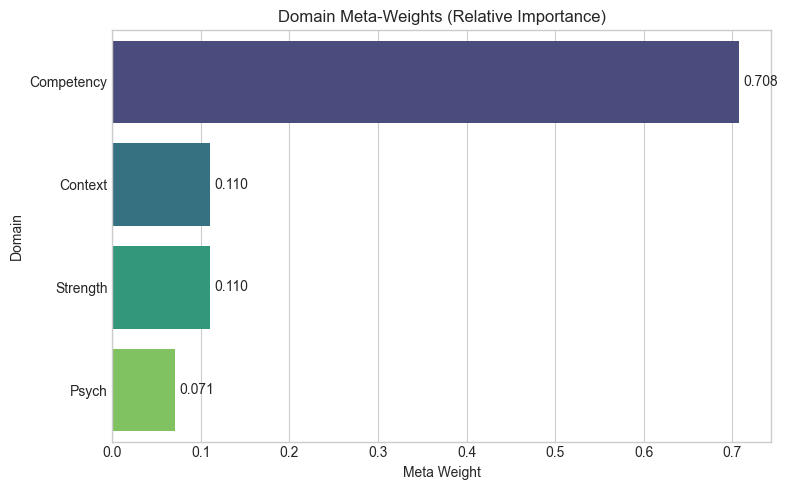

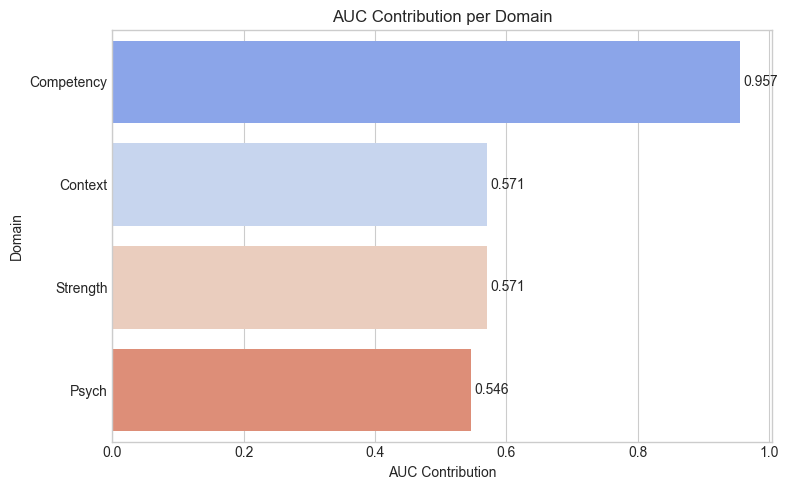

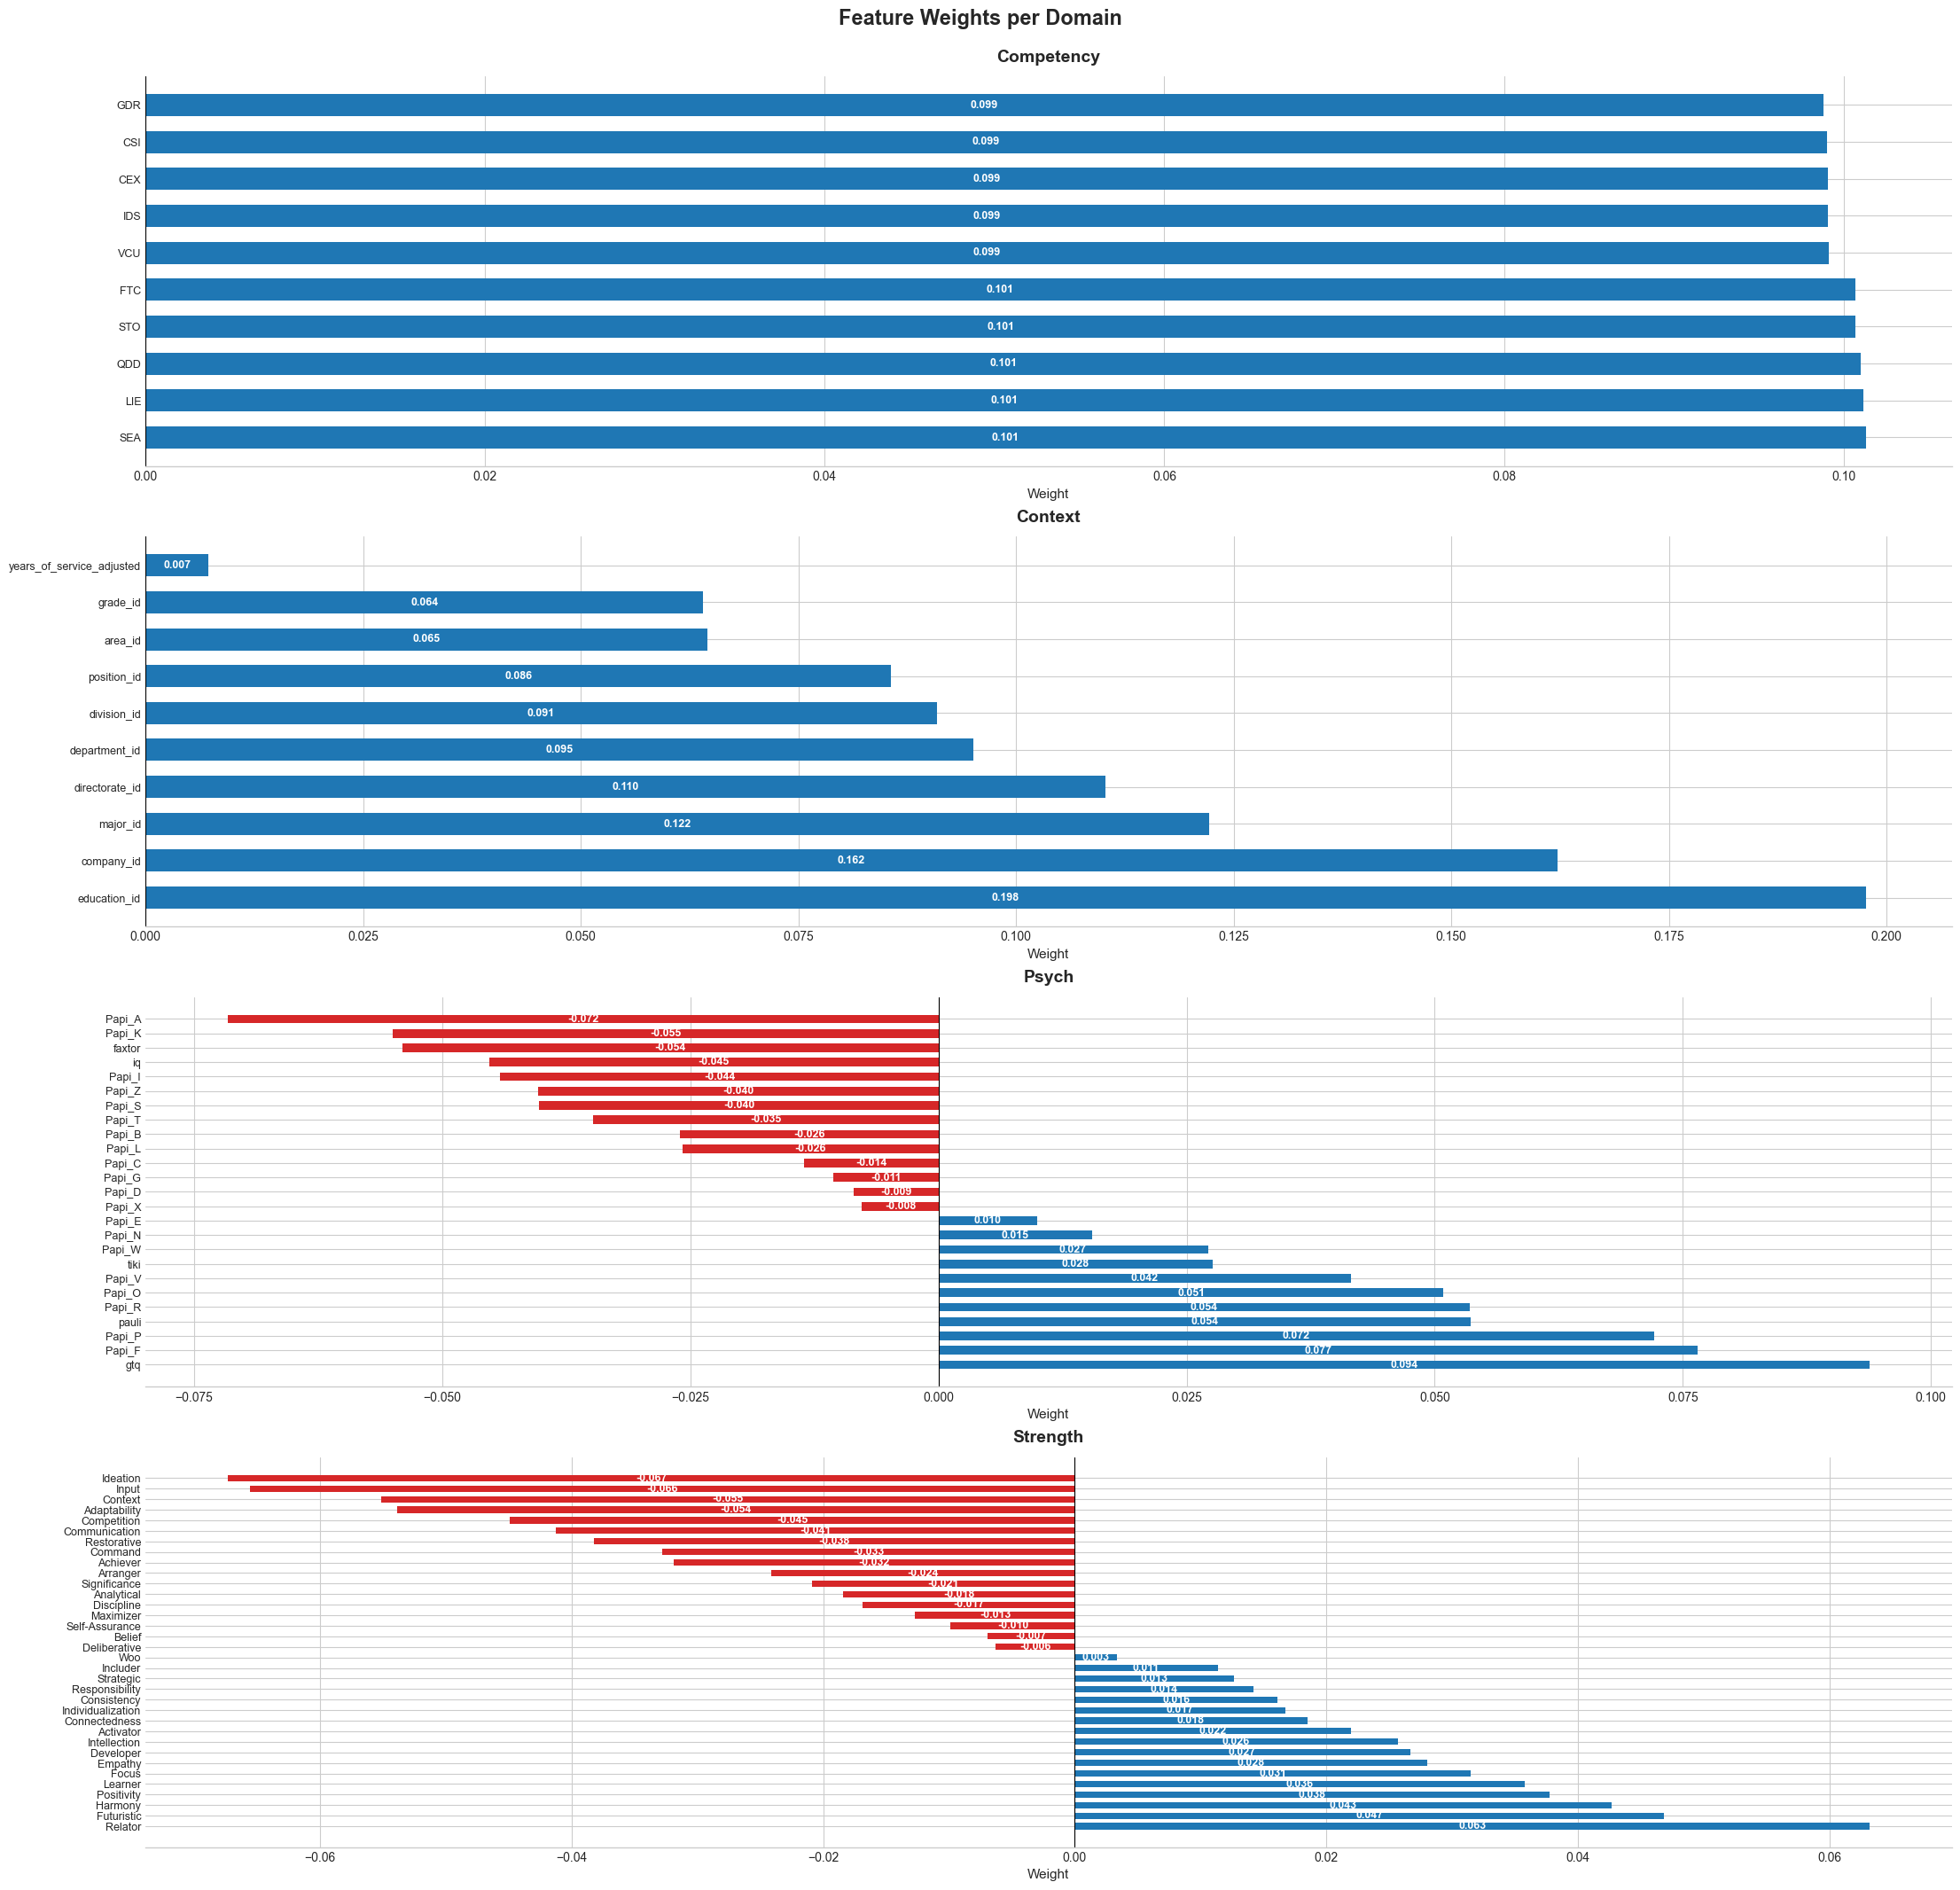

In [321]:
# =========================================
# 7) VISUALISASI
# =========================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# --- 1) Visualisasi Meta-Weight Domain ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=domain_weights,
    x="meta_weight", y="domain",
    palette="viridis", orient="h"
)
plt.title("Domain Meta-Weights (Relative Importance)")
plt.xlabel("Meta Weight")
plt.ylabel("Domain")
for i, v in enumerate(domain_weights['meta_weight']):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center')
plt.tight_layout()
plt.show()

# --- 2) Visualisasi AUC Contribution per Domain ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=domain_weights,
    x="AUC_contribution", y="domain",
    palette="coolwarm", orient="h"
)
plt.title("AUC Contribution per Domain")
plt.xlabel("AUC Contribution")
plt.ylabel("Domain")
for i, v in enumerate(domain_weights['AUC_contribution']):
    plt.text(v + 0.005, i, f"{v:.3f}", va='center')
plt.tight_layout()
plt.show()

# --- 3) Visualisasi Feature Weights per Domain (Final Lebar & Proporsional) ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Urutkan fitur berdasarkan domain dan weight
all_features_sorted = (
    feature_weights
    .sort_values(["domain", "weight"], ascending=[True, False])
    .reset_index(drop=True)
)

unique_domains = all_features_sorted["domain"].unique()

# Hitung tinggi dinamis per domain berdasarkan jumlah fitur
heights = {
    d: max(3, 0.25 * len(all_features_sorted[all_features_sorted["domain"] == d]))
    for d in unique_domains
}

# Tentukan total tinggi fig
total_height = sum(heights.values())

fig, axes = plt.subplots(
    nrows=len(unique_domains), ncols=1,
    figsize=(22, total_height),  # ⚡ lebih lebar & dinamis
    constrained_layout=True
)

if len(unique_domains) == 1:
    axes = [axes]

for ax, domain in zip(axes, unique_domains):
    subset = all_features_sorted[all_features_sorted["domain"] == domain].copy()

    # Warna: biru utk positif, merah utk negatif
    subset["color"] = np.where(subset["weight"] >= 0, "#1f77b4", "#d62728")

    bars = ax.barh(
        subset["feature"],
        subset["weight"],
        color=subset["color"],
        edgecolor="none",
        height=0.6  # sedikit renggang
    )

    # Nilai di tengah bar
    for bar, w in zip(bars, subset["weight"]):
        ax.text(
            w / 2,
            bar.get_y() + bar.get_height() / 2,
            f"{w:.3f}",
            ha="center", va="center",
            color="white", fontsize=9, fontweight="bold"
        )

    # Judul & gaya
    ax.set_title(f"{domain}", fontsize=14, fontweight="bold", pad=12)
    ax.set_xlabel("Weight", fontsize=11)
    ax.set_ylabel("")
    ax.tick_params(axis="y", labelsize=9)
    ax.axvline(0, color="black", linewidth=0.8)
    ax.set_facecolor("white")
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)

fig.suptitle("Feature Weights per Domain", fontsize=17, fontweight="bold", y=1.02)
plt.show()
